# CIS9650 Programming for Analytics by Prof. Jason Tseng
## Final Project Submission: Group 8
### Date: May 11th, 2023

## Installing any required libraries

In [1]:
#pip install kaggle
#pip install plotly

## Importing required libraries  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors
import calendar
import plotly.graph_objects as plotly

## Reading the data

In [3]:
flights_data = pd.read_csv('US_flights_2023.csv')
disrupted_data = pd.read_csv('Cancelled_Diverted_2023.csv')

## Structure of our raw data

In [4]:
#displaying the number of columns for flights csv
num_columns = flights_data.shape[1]
print("Number of columns in the flights data:", num_columns)

#displaying the number of rows for flights csv
num_rows = flights_data.shape[0]
print("Number of rows in the flights data:", num_rows)

Number of columns in the flights data: 24
Number of rows in the flights data: 6743404


In [5]:
#displaying the number of columns for disrupted csv
num_columns = disrupted_data.shape[1]
print("Number of columns in the disrupted data:", num_columns)

#displaying the number of rows for disrupted csv 
num_rows = disrupted_data.shape[0]
print("Number of rows in the disrupted data:", num_rows)

Number of columns in the disrupted data: 23
Number of rows in the disrupted data: 104488


## Data cleaning

### Dealing with the null values
Both the datasets had 0 NaN values. They did have plenty of 0's which are dealt with as we move on with the analysis

In [6]:
#calculating the total number of null values 
flights_null_sum = flights_data.isnull().sum()
print('Sum of null values in flights data:')
print(flights_null_sum)

disrupted_null_sum = disrupted_data.isnull().sum()
print('Sum of null values in disrupted data:')
print(disrupted_null_sum)


Sum of null values in flights data:
FlightDate            0
Day_Of_Week           0
Airline               0
Tail_Number           0
Dep_Airport           0
Dep_CityName          0
DepTime_label         0
Dep_Delay             0
Dep_Delay_Tag         0
Dep_Delay_Type        0
Arr_Airport           0
Arr_CityName          0
Arr_Delay             0
Arr_Delay_Type        0
Flight_Duration       0
Distance_type         0
Delay_Carrier         0
Delay_Weather         0
Delay_NAS             0
Delay_Security        0
Delay_LastAircraft    0
Manufacturer          0
Model                 0
Aicraft_age           0
dtype: int64
Sum of null values in disrupted data:
FlightDate            0
Day_Of_Week           0
Airline               0
Tail_Number           0
Cancelled             0
Diverted              0
Dep_Airport           0
Dep_CityName          0
DepTime_label         0
Dep_Delay             0
Dep_Delay_Tag         0
Dep_Delay_Type        0
Arr_Airport           0
Arr_CityName          0
A

### Dealing with duplicates

In [7]:
#flights data
#checking for any duplicates and displaying them
duplicated_rows = flights_data.duplicated()
num_duplicates = duplicated_rows.sum()
print("Number of duplicated rows:", num_duplicates)

#dropping duplicates 
cleaned_flights_data = flights_data.drop_duplicates()

Number of duplicated rows: 31


In [8]:
#disrupted data
#checking for any duplicates and displaying them
duplicated_rows = disrupted_data.duplicated()
num_duplicates = duplicated_rows.sum()
print("Number of duplicates:", num_duplicates)

#dropping duplicates 
cleaned_disrupted_data = disrupted_data.drop_duplicates()

Number of duplicates: 945


### Dropping columns

In [9]:
#flights data
columns_to_drop = ['Dep_CityName', 'Dep_Delay_Tag', 'Arr_CityName', 'Arr_Airport', 'Arr_Delay', 'Arr_Delay_Type', 'Flight_Duration', 'Delay_Carrier', 'Delay_Weather', 'Delay_NAS', 'Delay_Security', 'Delay_LastAircraft', 'Model']
cleaned_flights_data = cleaned_flights_data.drop(columns_to_drop, axis=1)

In [10]:
#disrupted data
columns_to_drop = ['Dep_CityName', 'Dep_Delay_Tag', 'Arr_CityName', 'Arr_Delay', 'Arr_Delay_Type', 'Arr_Airport',  'Flight_Duration', 'Delay_Carrier', 'Delay_Weather', 'Delay_NAS', 'Delay_Security', 'Delay_LastAircraft']
cleaned_disrupted_data = cleaned_disrupted_data.drop(columns_to_drop, axis=1)

In [11]:
cleaned_flights_data.head(5)

,FlightDate,Day_Of_Week,Airline,Tail_Number,Dep_Airport,DepTime_label,Dep_Delay,Dep_Delay_Type,Distance_type,Manufacturer,Aicraft_age
0,2023-01-02,1,Endeavor Air,N605LR,BDL,Morning,-3,Low <5min,Short Haul >1500Mi,CANADAIR REGIONAL JET,16
1,2023-01-03,2,Endeavor Air,N605LR,BDL,Morning,-5,Low <5min,Short Haul >1500Mi,CANADAIR REGIONAL JET,16
2,2023-01-04,3,Endeavor Air,N331PQ,BDL,Morning,-5,Low <5min,Short Haul >1500Mi,CANADAIR REGIONAL JET,10
3,2023-01-05,4,Endeavor Air,N906XJ,BDL,Morning,-6,Low <5min,Short Haul >1500Mi,CANADAIR REGIONAL JET,17
4,2023-01-06,5,Endeavor Air,N337PQ,BDL,Morning,-1,Low <5min,Short Haul >1500Mi,CANADAIR REGIONAL JET,10


In [12]:
cleaned_disrupted_data.head(5)    #columns 'cancelled' and 'diverted' here are in binary classification

,FlightDate,Day_Of_Week,Airline,Tail_Number,Cancelled,Diverted,Dep_Airport,DepTime_label,Dep_Delay,Dep_Delay_Type,Distance_type
0,2023-01-25,3,Endeavor Air,N691CA,1.0,0.0,JFK,Evening,0.0,No Departure Delay,Short Haul
1,2023-01-03,2,Endeavor Air,N937XJ,1.0,0.0,MSP,Morning,0.0,No Departure Delay,Short Haul
2,2023-01-03,2,Endeavor Air,N937XJ,1.0,0.0,PIT,Afternoon,0.0,No Departure Delay,Short Haul
3,2023-01-11,3,Endeavor Air,N926XJ,1.0,0.0,BWI,Afternoon,0.0,No Departure Delay,Short Haul
4,2023-01-25,3,Endeavor Air,N335PQ,0.0,1.0,BWI,Afternoon,2.0,No Departure Delay,Short Haul


### Changing the column type

In [13]:
#displaying the structure of each dataframe
cleaned_flights_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6743373 entries, 0 to 6743403
Data columns (total 11 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   FlightDate      object
 1   Day_Of_Week     int64 
 2   Airline         object
 3   Tail_Number     object
 4   Dep_Airport     object
 5   DepTime_label   object
 6   Dep_Delay       int64 
 7   Dep_Delay_Type  object
 8   Distance_type   object
 9   Manufacturer    object
 10  Aicraft_age     int64 
dtypes: int64(3), object(8)
memory usage: 617.4+ MB


In [14]:
cleaned_disrupted_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103543 entries, 0 to 104487
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FlightDate      103543 non-null  object 
 1   Day_Of_Week     103543 non-null  int64  
 2   Airline         103543 non-null  object 
 3   Tail_Number     103543 non-null  object 
 4   Cancelled       103543 non-null  float64
 5   Diverted        103543 non-null  float64
 6   Dep_Airport     103543 non-null  object 
 7   DepTime_label   103543 non-null  object 
 8   Dep_Delay       103543 non-null  float64
 9   Dep_Delay_Type  103543 non-null  object 
 10  Distance_type   103543 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 9.5+ MB


In [15]:
#changing the dtype using .astype
columns_to_convert = ['Cancelled', 'Diverted', 'Dep_Delay']
cleaned_disrupted_data[columns_to_convert] = cleaned_disrupted_data[columns_to_convert].astype(int)

## Preliminary exploratory data analysis based on the unfiltered data

### Numerical vs. Categorical features
- Categorical data is often easier to interpret as it represents discrete categories or labels and aids in understanding the distribution of observations across different categories, facilitating exploratory data analysis.
- Numerical data allows for quantitative analysis, enabling mathematical operations such as mean, median, standard deviation, etc.

Categorical features: Index(['FlightDate', 'Airline', 'Tail_Number', 'Dep_Airport', 'DepTime_label',
       'Dep_Delay_Type', 'Distance_type', 'Manufacturer'],
      dtype='object')
Numerical features: Index(['Day_Of_Week', 'Dep_Delay', 'Aicraft_age'], dtype='object')


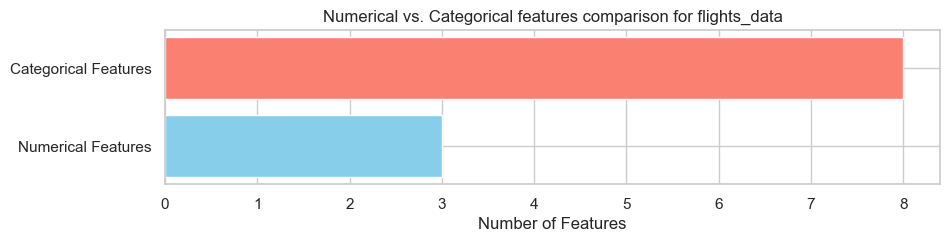

In [16]:
#understanding the categorical to numerical data ratio
#displaying the categoraical features
cat_features = cleaned_flights_data.select_dtypes(include=['object', 'category']).columns
print('Categorical features:', cat_features)

#displaying the numerical features
num_features = cleaned_flights_data.select_dtypes(include=['int64', 'float64']).columns
print('Numerical features:', num_features)

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 2))
bars = ax.barh(['Numerical Features', 'Categorical Features'], [len(num_features), len(cat_features)],
               color=['skyblue', 'salmon'])

# Setting labels and title
plt.xlabel('Number of Features')
plt.title('Numerical vs. Categorical features comparison for flights_data')

plt.show()

### The largest airlines manufacturer for Unites States 2023

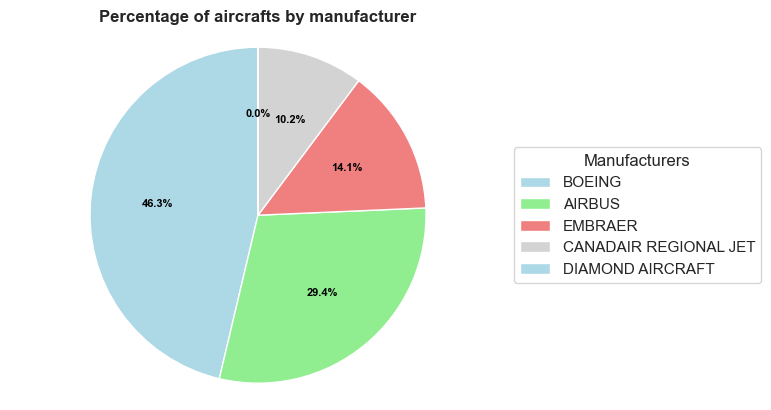

In [17]:
#counting the number of manufacturers and grouping them for visual representataion of the data
manufacturer_counts = cleaned_flights_data['Manufacturer'].value_counts()

#defining the colour scheme for the chart
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightgray']

#plotting the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(manufacturer_counts, autopct='%1.1f%%', startangle=90, colors=colors)

#improving the display of the percentage labels
plt.setp(autotexts, size=8, weight="bold", color="black")

#manufacturer names right beside the pies made the chart look messy thus, we are using 'legends'
#adding a legend with manufacturer names
ax.legend(wedges, manufacturer_counts.index,
          title="Manufacturers",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

plt.title('Percentage of aircrafts by manufacturer', fontweight = 'bold')
plt.show()

From the above graph, we can infer that:
- Boeing is the dominant player in the indusrty with almost half a share of the industry.
- Airbus with the second largest market share is acting as  a strong competitor for Boeing
- Canadair Regional Jet and Diamond Aircraft have very small shares (combined 0.2%). This indicates that they occupy niche markets within the aviation industry. For example, Diamond Aircraft primarily produces general aviation aircraft rather than large commercial jets.

### Largest operating airline vs. largest cancellation count

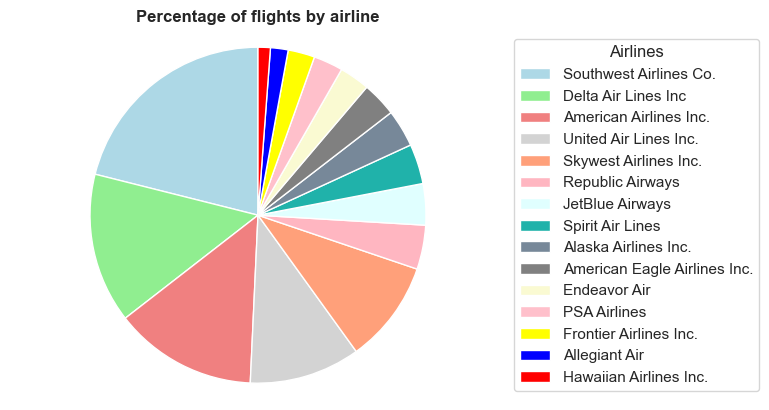

In [18]:
#counting the number of airlines and grouping them for visual representataion of the data
airline_counts = cleaned_flights_data['Airline'].value_counts()

#defining the colour scheme for the chart
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightgray', 'lightsalmon', 'lightpink', 'lightcyan', 'lightseagreen', 'lightslategrey', 'grey', 'lightgoldenrodyellow', 'pink', 'yellow', 'blue', 'red']

#plotting the pie chart
fig, ax = plt.subplots()
wedges, _ = ax.pie(airline_counts, startangle=90, colors=colors)

# Adding a legend with airline names
ax.legend(wedges, airline_counts.index,
          title="Airlines",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

plt.title('Percentage of flights by airline', fontweight='bold')
plt.show()

When we have various categories, using a pie chart as represenatation is not ideal as it makes the data appear untidy and also is not very informative as we see from the graph above. Let us re-do this in a better way ! 

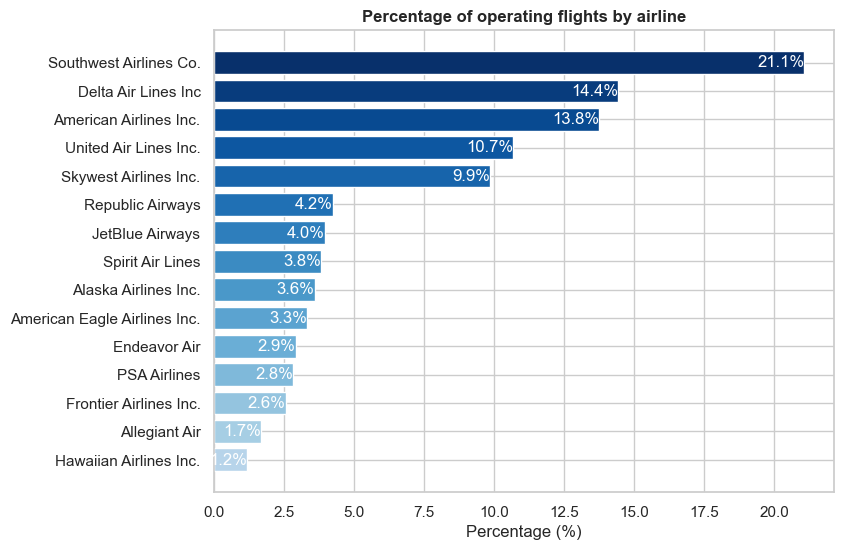

In [19]:
#counting the number of airlines and grouping them for visual representataion of the data
airline_counts = cleaned_flights_data['Airline'].value_counts()

#calculating the total number of airlines for percentage
total = airline_counts.sum()
percentages = (airline_counts / total) * 100

#creating a new dataframe to plot airlines against their total percentage in flights_data
airline_data = pd.DataFrame({'Airlines': airline_counts.index, 'Percentage': percentages})

#displaying the intensity of the percentage from light to dark
#inverting y-axis to show the largest values on top
color_scale = [mcolors.to_hex(c) for c in plt.cm.Blues(np.linspace(1, 0.3, len(airline_data)))]

plt.figure(figsize=(8, 6))
bars = plt.barh(airline_data['Airlines'], airline_data['Percentage'], color=color_scale)
plt.xlabel('Percentage (%)')
plt.title('Percentage of operating flights by airline', fontweight = 'bold')
plt.gca().invert_yaxis()

#adding percentage symbols to the bar for more readability
for bar, value in zip(bars, airline_data['Percentage']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.1f}%', va='center', ha='right', color='white')

plt.show()

Southwest Airlines Co. is the largest airlines in the United States in terms of the number of flights operated. Further, Southwest has an entire fleet is composed of Boeing 737s which in return also contributes in Boeing being the largest manufacturer.

From the graph above, we can infer that:
- Southwest Airlines Co. holds a significant market share thus suggests that it has a strong presence in the market.
- The top five airlines, together account for a significant portion of the flights.
- Airlines like JetBlue Airways, and Spirit Air Lines operate a moderate number of flights, indicating healthy competition in the mid-tier segment of the market.
- Airlines such as Hawaiian Airlines Inc. and Allegiant Air, might be focusing on niche markets or specific routes, as suggested by their lower percentage of total flights.
- Airlines with higher percentages are likely operating at a greater scale, which may contribute to operational efficiencies and the ability to offer more competitive fares.

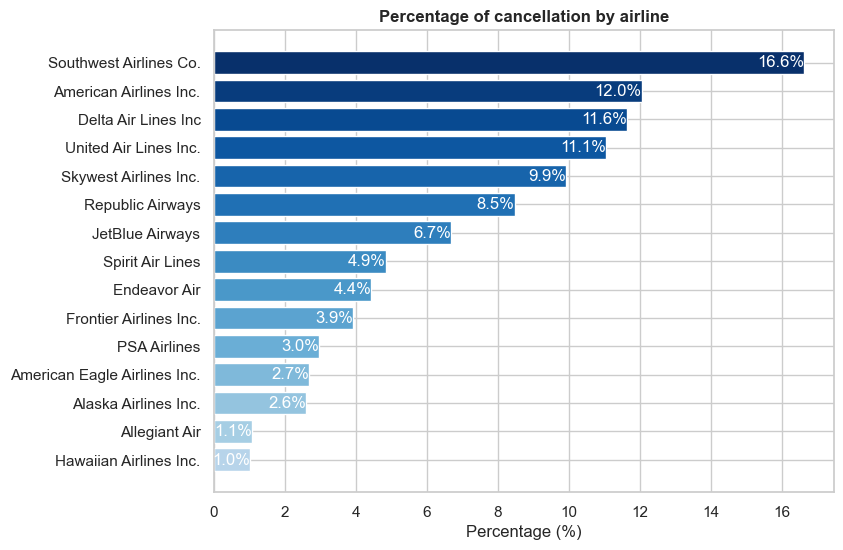

In [20]:
#counting the number of airlines and grouping them for visual representataion of the data
cancellation_counts = cleaned_disrupted_data['Airline'].value_counts()

#calculating the total number of airlines for percentage
total = cancellation_counts.sum()
percentages = (cancellation_counts / total) * 100

#creating a new dataframe to plot airlines against their total percentage in flights_data
cancellaltion_data = pd.DataFrame({'Airlines': cancellation_counts.index, 'Percentage': percentages})

#displaying the intensity of the percentage from light to dark
#inverting y-axis to show the largest values on top
color_scale = [mcolors.to_hex(c) for c in plt.cm.Blues(np.linspace(1, 0.3, len(airline_data)))]

plt.figure(figsize=(8, 6))
bars = plt.barh(cancellaltion_data['Airlines'], cancellaltion_data['Percentage'], color=color_scale)
plt.xlabel('Percentage (%)')
plt.title('Percentage of cancellation by airline', fontweight = 'bold')
plt.gca().invert_yaxis()

#adding percentage symbols to the bar for more readability
for bar, value in zip(bars, cancellaltion_data['Percentage']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.1f}%', va='center', ha='right', color='white')

plt.show()

### Operating flights vs. cancelled flights as per Day_Of_Week

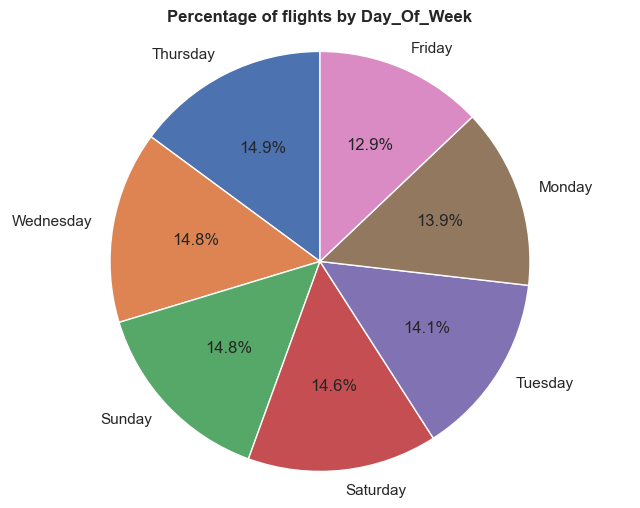

In [21]:
#finding the percentage of flights operated per day of the week
#using a dictionary similar to one used in cancellation_data for day mapping
day_mapping = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}

#counting the occurences of each weekday
day_counts = flights_data['Day_Of_Week'].map(day_mapping).value_counts()

#plotting the graph
plt.figure(figsize=(8, 6))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of flights by Day_Of_Week', fontweight = 'bold')
plt.axis('equal')
plt.show()

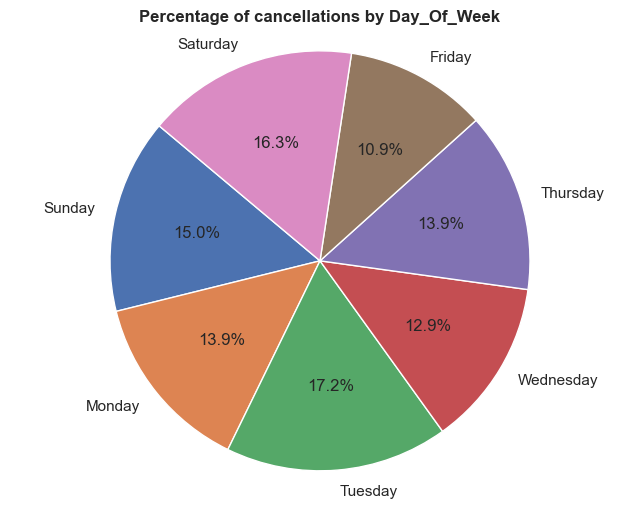

In [22]:
# Group the data by 'Day_Of_Week' and count cancellations in each group
cancellation_per_day = cleaned_disrupted_data[cleaned_disrupted_data['Cancelled'] == 1].groupby('Day_Of_Week')['Cancelled'].count()

# Create a dictionary to map day of the week numbers to day names
day_mapping = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}

# Replace day of the week numbers with actual day names
cancellation_per_day.index = cancellation_per_day.index.map(day_mapping)

# Calculate total number of cancellations
total_cancellations = cancellation_per_day.sum()

# Calculate percentage of cancellations for each day of the week
cancellation_percentage = (cancellation_per_day / total_cancellations) * 100

# Concatenate cancellation count and percentage Series along the columns axis
cancellation_stats = pd.concat([cancellation_per_day, cancellation_percentage], axis=1)

# Rename columns for clarity
cancellation_stats.columns = ['Cancellation Count', 'Cancellation Percentage']

plt.figure(figsize=(8, 6))
plt.pie(cancellation_percentage, labels=cancellation_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of cancellations by Day_Of_Week', fontweight = 'bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### Operating flights vs. cancellations based on 'Month'

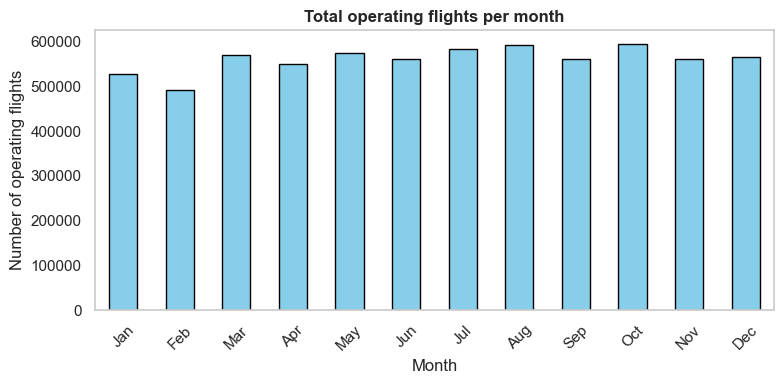

In [23]:
#extracting month from 'FlightDate' column
cleaned_flights_data['Month'] = pd.to_datetime(cleaned_flights_data['FlightDate']).dt.month

# Group the data by 'Month'
monthly_flights_count = cleaned_flights_data.groupby('Month').size()

# Get month names
month_names = [calendar.month_abbr[month] for month in range(1, 13)]

# Create a bar chart
plt.figure(figsize=(8, 4))
monthly_flights_count.plot(kind='bar', color='skyblue', edgecolor='black', grid = False)
plt.title('Total operating flights per month', fontweight = 'bold')
plt.xlabel('Month')
plt.ylabel('Number of operating flights')
plt.xticks(range(12), month_names, rotation=45)  # Use month names as x-axis labels
plt.tight_layout()
plt.show()

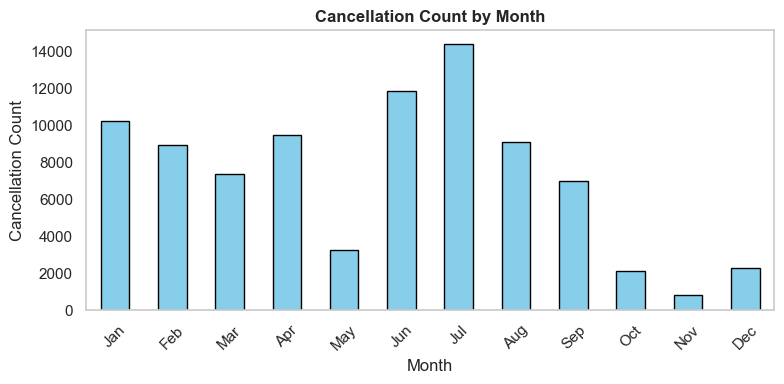

In [24]:
# Extract month from 'FlightDate' column
cleaned_disrupted_data['Month'] = pd.to_datetime(cleaned_disrupted_data['FlightDate']).dt.month

# Group the data by 'Month' and count cancellations in each group
cancellation_per_month = cleaned_disrupted_data[cleaned_disrupted_data['Cancelled'] == 1].groupby('Month')['Cancelled'].count()

# Get month names
month_names = [calendar.month_abbr[month] for month in range(1, 13)]

# Create a bar chart
plt.figure(figsize=(8, 4))
cancellation_per_month.plot(kind='bar', color='skyblue', edgecolor='black', grid = False)
plt.title('Cancellation Count by Month', fontweight = 'bold')
plt.xlabel('Month')
plt.ylabel('Cancellation Count')
plt.xticks(range(12), month_names, rotation=45)  # Use month names as x-axis labels
plt.tight_layout()
plt.show()

## Data filtering

As our goal of the analysis is to primarily focus on the most delayed/cancelled/diverted airports, the group decided to further narrow down the approach by zooming in the cases where departure delays are either 'Medium' or 'High'.  

For cleaned_flights_data, the total observations for 'Dep_Delay_Type' are as follows: 
1. Low < 5 mins 
2. Medium > 15 mins 
3. High > 60 mins 

For cleaned_disrupted_flights, the total observations for 'Dep_Delay_Type' are as follows: 
1. No Departure Delay 
2. Low Departure Delay 
3. High Departure Delay 

In [25]:
cleaned_flights_data.head(5)

,FlightDate,Day_Of_Week,Airline,Tail_Number,Dep_Airport,DepTime_label,Dep_Delay,Dep_Delay_Type,Distance_type,Manufacturer,Aicraft_age,Month
0,2023-01-02,1,Endeavor Air,N605LR,BDL,Morning,-3,Low <5min,Short Haul >1500Mi,CANADAIR REGIONAL JET,16,1
1,2023-01-03,2,Endeavor Air,N605LR,BDL,Morning,-5,Low <5min,Short Haul >1500Mi,CANADAIR REGIONAL JET,16,1
2,2023-01-04,3,Endeavor Air,N331PQ,BDL,Morning,-5,Low <5min,Short Haul >1500Mi,CANADAIR REGIONAL JET,10,1
3,2023-01-05,4,Endeavor Air,N906XJ,BDL,Morning,-6,Low <5min,Short Haul >1500Mi,CANADAIR REGIONAL JET,17,1
4,2023-01-06,5,Endeavor Air,N337PQ,BDL,Morning,-1,Low <5min,Short Haul >1500Mi,CANADAIR REGIONAL JET,10,1


In [26]:
cleaned_disrupted_data.head(5)

,FlightDate,Day_Of_Week,Airline,Tail_Number,Cancelled,Diverted,Dep_Airport,DepTime_label,Dep_Delay,Dep_Delay_Type,Distance_type,Month
0,2023-01-25,3,Endeavor Air,N691CA,1,0,JFK,Evening,0,No Departure Delay,Short Haul,1
1,2023-01-03,2,Endeavor Air,N937XJ,1,0,MSP,Morning,0,No Departure Delay,Short Haul,1
2,2023-01-03,2,Endeavor Air,N937XJ,1,0,PIT,Afternoon,0,No Departure Delay,Short Haul,1
3,2023-01-11,3,Endeavor Air,N926XJ,1,0,BWI,Afternoon,0,No Departure Delay,Short Haul,1
4,2023-01-25,3,Endeavor Air,N335PQ,0,1,BWI,Afternoon,2,No Departure Delay,Short Haul,1


### Filtering the flights data

In [27]:
#checking for any leading empty spcaes
cleaned_flights_data['Dep_Delay_Type'] = cleaned_flights_data['Dep_Delay_Type'].str.strip()

#creating a boolean mask
mask = cleaned_flights_data['Dep_Delay_Type'] != 'Low <5min'

#appling the mask
filtered = cleaned_flights_data[mask]

#updating the DataFrame
filtered_flights = filtered.copy()

In [28]:
filtered_flights   # we are going to use this dataframe for our further analysis

,FlightDate,Day_Of_Week,Airline,Tail_Number,Dep_Airport,DepTime_label,Dep_Delay,Dep_Delay_Type,Distance_type,Manufacturer,Aicraft_age,Month
11,2023-01-11,3,Endeavor Air,N135EV,LGA,Evening,35,Medium >15min,Short Haul >1500Mi,CANADAIR REGIONAL JET,15,1
12,2023-01-12,4,Endeavor Air,N197PQ,LGA,Evening,132,Hight >60min,Short Haul >1500Mi,CANADAIR REGIONAL JET,16,1
18,2023-01-19,4,Endeavor Air,N691CA,LGA,Evening,676,Hight >60min,Short Haul >1500Mi,CANADAIR REGIONAL JET,17,1
20,2023-01-22,7,Endeavor Air,N310PQ,LGA,Evening,29,Medium >15min,Short Haul >1500Mi,CANADAIR REGIONAL JET,10,1
21,2023-01-23,1,Endeavor Air,N917XJ,LGA,Evening,27,Medium >15min,Short Haul >1500Mi,CANADAIR REGIONAL JET,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6743392,2023-12-31,7,JetBlue Airways,N3065J,JFK,Afternoon,66,Hight >60min,Short Haul >1500Mi,AIRBUS,3,12
6743393,2023-12-31,7,JetBlue Airways,N552JB,FLL,Afternoon,245,Hight >60min,Short Haul >1500Mi,AIRBUS,22,12
6743394,2023-12-31,7,JetBlue Airways,N937JB,BOS,Afternoon,60,Medium >15min,Short Haul >1500Mi,AIRBUS,10,12
6743398,2023-12-31,7,JetBlue Airways,N661JB,JFK,Morning,20,Medium >15min,Short Haul >1500Mi,AIRBUS,17,12


### Filtering the disrupted data

In [29]:
#checking for any leading empty spcaes
cleaned_disrupted_data['Dep_Delay_Type'] = cleaned_disrupted_data['Dep_Delay_Type'].str.strip()

#creating a boolean mask
mask = cleaned_disrupted_data['Dep_Delay_Type'] != 'No Departure Delay'

#appling the mask
filtered2 = cleaned_disrupted_data[mask]

#updating the DataFrame
filtered_disrupted = filtered2.copy()

In [30]:
filtered_disrupted   # we are going to use this dataframe for our further analysis

,FlightDate,Day_Of_Week,Airline,Tail_Number,Cancelled,Diverted,Dep_Airport,DepTime_label,Dep_Delay,Dep_Delay_Type,Distance_type,Month
109,2023-01-25,3,Endeavor Air,N298PQ,0,1,SDF,Afternoon,40,Low Departure Delay,Short Haul,1
148,2023-01-25,3,Endeavor Air,N925XJ,0,1,MSP,Afternoon,175,Hight Departure Delay,Short Haul,1
160,2023-01-03,2,Endeavor Air,N926XJ,0,1,DAY,Afternoon,21,Low Departure Delay,Short Haul,1
162,2023-01-23,1,Endeavor Air,N153PQ,1,0,JFK,Morning,132,Hight Departure Delay,Short Haul,1
217,2023-01-25,3,Endeavor Air,N926XJ,1,0,SAV,Evening,38,Low Departure Delay,Short Haul,1
...,...,...,...,...,...,...,...,...,...,...,...,...
104467,2023-12-27,3,JetBlue Airways,N529JB,0,1,PBI,Evening,67,Hight Departure Delay,Short Haul,12
104468,2023-12-27,3,JetBlue Airways,N633JB,0,1,MCO,Afternoon,97,Hight Departure Delay,Short Haul,12
104482,2023-12-28,4,JetBlue Airways,N529JB,0,1,HPN,Morning,70,Hight Departure Delay,Short Haul,12
104485,2023-12-29,5,JetBlue Airways,N661JB,0,1,TPA,Evening,122,Hight Departure Delay,Short Haul,12


## Shape of our dataframes

In [31]:
print('Shape of filtered_flights:', filtered_flights.shape)
print('Original Shape of flights_data:', flights_data.shape)

Shape of filtered_flights: (1333667, 12)
Original Shape of flights_data: (6743404, 24)


In [32]:
print('Shape of filtered_disrupted:', filtered_disrupted.shape)
print('Original Shape of disrupted_data:', disrupted_data.shape)

Shape of filtered_disrupted: (7745, 12)
Original Shape of disrupted_data: (104488, 23)


## Merging the two dataframes

In [33]:
#we will now try to merge the two dataframes onto a composite primary key (FlightDate & Trail_Number)
flights_merged = pd.merge(filtered_flights, filtered_disrupted, on=['FlightDate', 'Day_Of_Week', 'Airline', 'Tail_Number', 'Dep_Airport'], how='inner')

In [34]:
flights_merged

,FlightDate,Day_Of_Week,Airline,Tail_Number,Dep_Airport,DepTime_label_x,Dep_Delay_x,Dep_Delay_Type_x,Distance_type_x,Manufacturer,Aicraft_age,Month_x,Cancelled,Diverted,DepTime_label_y,Dep_Delay_y,Dep_Delay_Type_y,Distance_type_y,Month_y
0,2023-01-23,1,Endeavor Air,N303PQ,GSP,Evening,49,Medium >15min,Short Haul >1500Mi,CANADAIR REGIONAL JET,10,1,1,0,Morning,264,Hight Departure Delay,Short Haul,1
1,2023-01-14,6,Endeavor Air,N931XJ,JFK,Afternoon,55,Medium >15min,Short Haul >1500Mi,CANADAIR REGIONAL JET,16,1,0,1,Morning,32,Low Departure Delay,Short Haul,1
2,2023-01-23,1,Endeavor Air,N153PQ,JFK,Evening,184,Hight >60min,Short Haul >1500Mi,CANADAIR REGIONAL JET,17,1,1,0,Morning,132,Hight Departure Delay,Short Haul,1
3,2023-01-31,2,American Airlines Inc.,N123UW,DFW,Afternoon,137,Hight >60min,Short Haul >1500Mi,AIRBUS,24,1,1,0,Afternoon,22,Low Departure Delay,Short Haul,1
4,2023-01-04,3,American Airlines Inc.,N191UW,CLT,Evening,16,Medium >15min,Medium Haul <3000Mi,AIRBUS,23,1,1,0,Morning,110,Hight Departure Delay,Short Haul,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,2023-12-27,3,JetBlue Airways,N306JB,JFK,Evening,66,Hight >60min,Short Haul >1500Mi,EMBRAER,15,12,0,1,Evening,102,Hight Departure Delay,Short Haul,12
1070,2023-12-27,3,JetBlue Airways,N306JB,JFK,Morning,17,Medium >15min,Short Haul >1500Mi,EMBRAER,15,12,0,1,Evening,102,Hight Departure Delay,Short Haul,12
1071,2023-12-27,3,JetBlue Airways,N658JB,FLL,Afternoon,149,Hight >60min,Short Haul >1500Mi,AIRBUS,17,12,0,1,Evening,183,Hight Departure Delay,Short Haul,12
1072,2023-12-27,3,JetBlue Airways,N633JB,MCO,Morning,38,Medium >15min,Short Haul >1500Mi,AIRBUS,18,12,0,1,Afternoon,97,Hight Departure Delay,Short Haul,12


In [35]:
#further dropping the columns which maybe not useful in supporting our analysis
columns_to_drop = ['Month_x', 'Month_y']
flights_merged.drop(columns=columns_to_drop, inplace=True)

In [36]:
flights_merged

,FlightDate,Day_Of_Week,Airline,Tail_Number,Dep_Airport,DepTime_label_x,Dep_Delay_x,Dep_Delay_Type_x,Distance_type_x,Manufacturer,Aicraft_age,Cancelled,Diverted,DepTime_label_y,Dep_Delay_y,Dep_Delay_Type_y,Distance_type_y
0,2023-01-23,1,Endeavor Air,N303PQ,GSP,Evening,49,Medium >15min,Short Haul >1500Mi,CANADAIR REGIONAL JET,10,1,0,Morning,264,Hight Departure Delay,Short Haul
1,2023-01-14,6,Endeavor Air,N931XJ,JFK,Afternoon,55,Medium >15min,Short Haul >1500Mi,CANADAIR REGIONAL JET,16,0,1,Morning,32,Low Departure Delay,Short Haul
2,2023-01-23,1,Endeavor Air,N153PQ,JFK,Evening,184,Hight >60min,Short Haul >1500Mi,CANADAIR REGIONAL JET,17,1,0,Morning,132,Hight Departure Delay,Short Haul
3,2023-01-31,2,American Airlines Inc.,N123UW,DFW,Afternoon,137,Hight >60min,Short Haul >1500Mi,AIRBUS,24,1,0,Afternoon,22,Low Departure Delay,Short Haul
4,2023-01-04,3,American Airlines Inc.,N191UW,CLT,Evening,16,Medium >15min,Medium Haul <3000Mi,AIRBUS,23,1,0,Morning,110,Hight Departure Delay,Short Haul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,2023-12-27,3,JetBlue Airways,N306JB,JFK,Evening,66,Hight >60min,Short Haul >1500Mi,EMBRAER,15,0,1,Evening,102,Hight Departure Delay,Short Haul
1070,2023-12-27,3,JetBlue Airways,N306JB,JFK,Morning,17,Medium >15min,Short Haul >1500Mi,EMBRAER,15,0,1,Evening,102,Hight Departure Delay,Short Haul
1071,2023-12-27,3,JetBlue Airways,N658JB,FLL,Afternoon,149,Hight >60min,Short Haul >1500Mi,AIRBUS,17,0,1,Evening,183,Hight Departure Delay,Short Haul
1072,2023-12-27,3,JetBlue Airways,N633JB,MCO,Morning,38,Medium >15min,Short Haul >1500Mi,AIRBUS,18,0,1,Afternoon,97,Hight Departure Delay,Short Haul


## Statistical analysis 

In [37]:
#trying to brainstorm the Dep_Delay data 
flights_merged['Dep_Delay_x'].describe().round(2)

count    1074.00
mean      119.13
std       153.16
min        16.00
25%        34.00
50%        79.00
75%       145.75
max      1305.00
Name: Dep_Delay_x, dtype: float64

In [38]:
flights_merged['Dep_Delay_y'].describe().round(2)

count    1074.00
mean      101.16
std       115.96
min        16.00
25%        35.00
50%        68.00
75%       126.75
max      1553.00
Name: Dep_Delay_y, dtype: float64

In [39]:
#statistics about the aircraft age
flights_merged['Aicraft_age'].describe().round(2)

count    1074.00
mean       14.41
std         7.86
min         1.00
25%         8.00
50%        14.00
75%        21.00
max        48.00
Name: Aicraft_age, dtype: float64

### Mean age by airline 

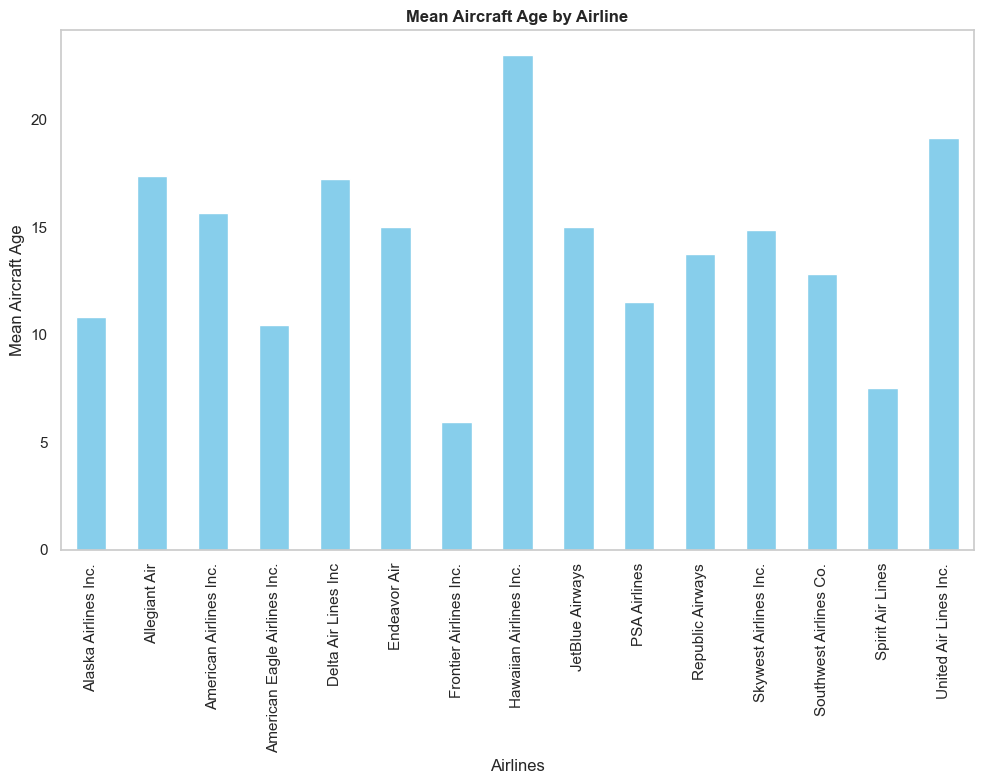

In [40]:
airline_grouped = flights_merged.groupby('Airline')
mean_age_by_airline = airline_grouped['Aicraft_age'].mean()

plt.figure(figsize=(10, 8))  
mean_age_by_airline.plot(kind='bar', color='skyblue', grid = False)
plt.title('Mean Aircraft Age by Airline', fontweight = 'bold')
plt.xlabel('Airlines')
plt.ylabel('Mean Aircraft Age')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Mean delay_x and delay_y by airline

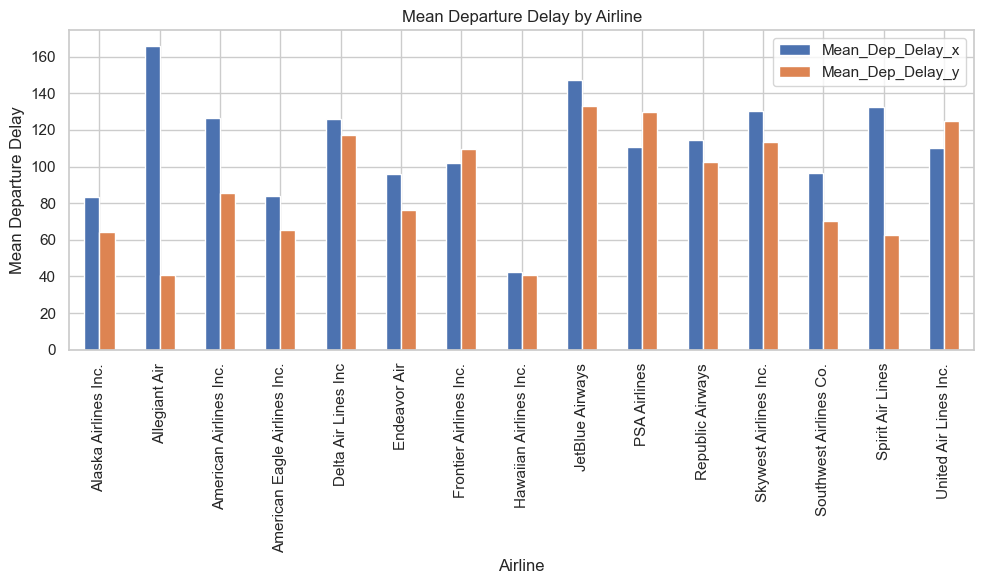

In [41]:
delay_x_grouped = flights_merged.groupby('Airline')
mean_delay_x = delay_x_grouped['Dep_Delay_x'].mean()

delay_y_grouped = flights_merged.groupby('Airline')
mean_delay_y = delay_y_grouped['Dep_Delay_y'].mean()

mean_delay_combined = pd.concat([mean_delay_x, mean_delay_y], axis=1)
mean_delay_combined.columns = ['Mean_Dep_Delay_x', 'Mean_Dep_Delay_y']

mean_delay_combined.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Departure Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Mean Departure Delay')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [42]:
flights_merged

,FlightDate,Day_Of_Week,Airline,Tail_Number,Dep_Airport,DepTime_label_x,Dep_Delay_x,Dep_Delay_Type_x,Distance_type_x,Manufacturer,Aicraft_age,Cancelled,Diverted,DepTime_label_y,Dep_Delay_y,Dep_Delay_Type_y,Distance_type_y
0,2023-01-23,1,Endeavor Air,N303PQ,GSP,Evening,49,Medium >15min,Short Haul >1500Mi,CANADAIR REGIONAL JET,10,1,0,Morning,264,Hight Departure Delay,Short Haul
1,2023-01-14,6,Endeavor Air,N931XJ,JFK,Afternoon,55,Medium >15min,Short Haul >1500Mi,CANADAIR REGIONAL JET,16,0,1,Morning,32,Low Departure Delay,Short Haul
2,2023-01-23,1,Endeavor Air,N153PQ,JFK,Evening,184,Hight >60min,Short Haul >1500Mi,CANADAIR REGIONAL JET,17,1,0,Morning,132,Hight Departure Delay,Short Haul
3,2023-01-31,2,American Airlines Inc.,N123UW,DFW,Afternoon,137,Hight >60min,Short Haul >1500Mi,AIRBUS,24,1,0,Afternoon,22,Low Departure Delay,Short Haul
4,2023-01-04,3,American Airlines Inc.,N191UW,CLT,Evening,16,Medium >15min,Medium Haul <3000Mi,AIRBUS,23,1,0,Morning,110,Hight Departure Delay,Short Haul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,2023-12-27,3,JetBlue Airways,N306JB,JFK,Evening,66,Hight >60min,Short Haul >1500Mi,EMBRAER,15,0,1,Evening,102,Hight Departure Delay,Short Haul
1070,2023-12-27,3,JetBlue Airways,N306JB,JFK,Morning,17,Medium >15min,Short Haul >1500Mi,EMBRAER,15,0,1,Evening,102,Hight Departure Delay,Short Haul
1071,2023-12-27,3,JetBlue Airways,N658JB,FLL,Afternoon,149,Hight >60min,Short Haul >1500Mi,AIRBUS,17,0,1,Evening,183,Hight Departure Delay,Short Haul
1072,2023-12-27,3,JetBlue Airways,N633JB,MCO,Morning,38,Medium >15min,Short Haul >1500Mi,AIRBUS,18,0,1,Afternoon,97,Hight Departure Delay,Short Haul


### Mean delays by airport

In [43]:
#finding the total number of airports
total_airports = flights_merged['Dep_Airport'].value_counts().shape[0]
print("Total number of airports:", total_airports)

Total number of airports: 78


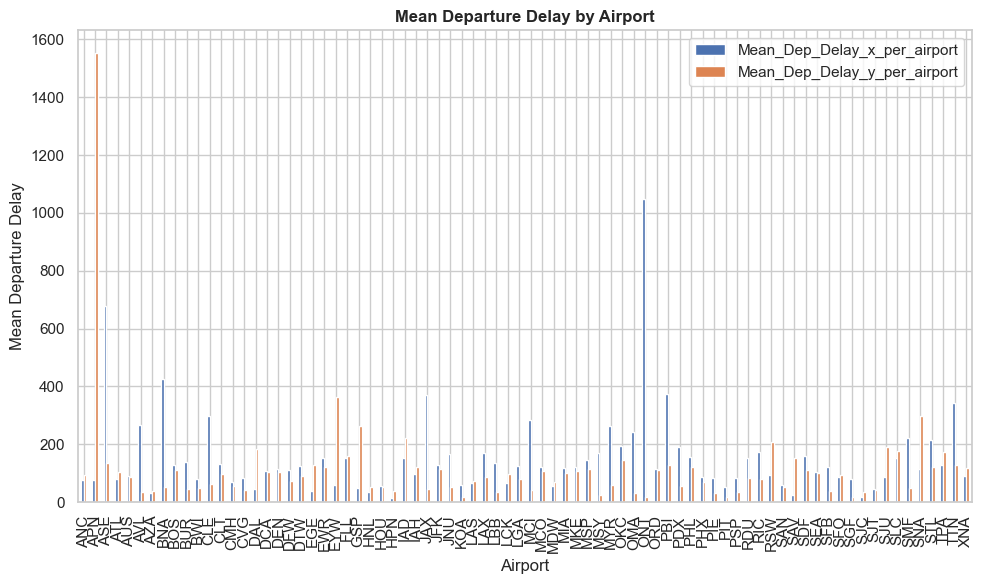

In [44]:
delay_x_grouped_per_airport = flights_merged.groupby('Dep_Airport')
airport_mean_delay_x = delay_x_grouped_per_airport['Dep_Delay_x'].mean()

delay_y_grouped_per_airport = flights_merged.groupby('Dep_Airport')
airport_mean_delay_y = delay_y_grouped_per_airport['Dep_Delay_y'].mean()

airport_mean_delay_combined = pd.concat([airport_mean_delay_x, airport_mean_delay_y], axis=1)
airport_mean_delay_combined.columns = ['Mean_Dep_Delay_x_per_airport', 'Mean_Dep_Delay_y_per_airport']

airport_mean_delay_combined.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Departure Delay by Airport', fontweight = 'bold')
plt.xlabel('Airport')
plt.ylabel('Mean Departure Delay')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

One way to find 'mean delay by the airport' and 'mean delay by airline' could be by calcultating the avearge of the averages and this is something we would like to focus on later when we do not have the time constraint. 

### Creating a correlation matrix

C:\Users\Yash\AppData\Local\Temp\ipykernel_46728\2897315002.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = flights_merged.corr()


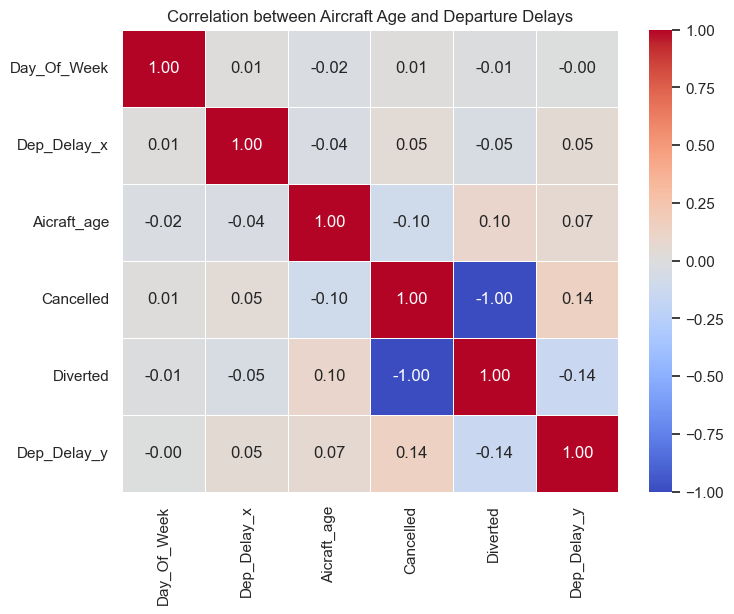

In [55]:
corr = flights_merged.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between Aircraft Age and Departure Delays')
plt.show()

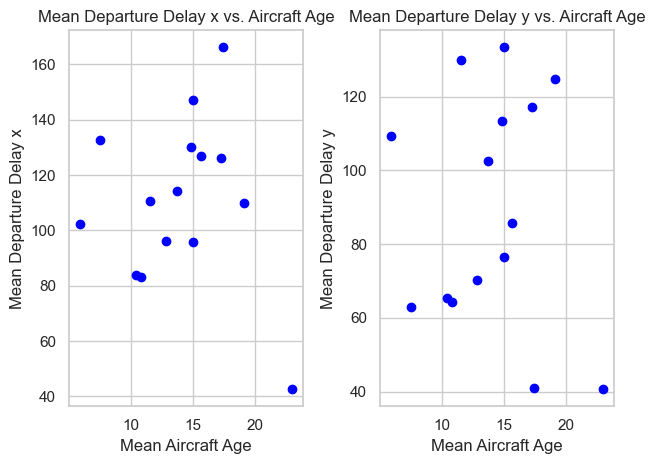

In [58]:
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(mean_age_by_airline, mean_delay_x, color='blue')  # Scatter plot
plt.title('Mean Departure Delay x vs. Aircraft Age')  # Title
plt.xlabel('Mean Aircraft Age')  # X-axis label
plt.ylabel('Mean Departure Delay x')  # Y-axis label
plt.grid(True)  # Adding grid for better readability

# Second subplot for Mean_Dep_Delay_y
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(mean_age_by_airline, mean_delay_y, color='blue')  # Scatter plot
plt.title('Mean Departure Delay y vs. Aircraft Age')  # Title
plt.xlabel('Mean Aircraft Age')  # X-axis label
plt.ylabel('Mean Departure Delay y')  # Y-axis label
plt.grid(True)  # Adding grid for better readability

plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show() 